<h1><b>Stock Price Forecasting</b></h1>
<hr></hr>
<h5>Name : Shaun Kwo Rui Yu
</br>Class : DAAA/FT/1B/06
</br>Admin No.:2317933 </h5>

<hr></hr>
<h5><b>The objectives of this project are to:</b></h5>
<ol>
<li>Explore the provided dataset and gain insights into its structure and characteristics.</li>
<li>Build time series forecasting models to predict the stock prices of Apple, Amazon, and DBS for the next 60 days.</li>
</ol>

<h5><b>Background Info:</b></h5>
The dataset contains information related to stock prices, including historical prices for Apple, Amazon, and DBS. 
The goal is to develop time series forecasting models that accurately predict stock prices to aid in financial decision-making.

<h5><b>Additional Info:</b></h5>
Stock price forecasting involves predicting future values of a stock based on historical data. This information is crucial for investors and financial analysts to make informed decisions.

Potential Features Influencing Stock Prices:
<ol>
<li>Historical stock prices</li>
<li>Market trends</li>
<li>External factors affecting the stock market</li>
</ol>

<h5><b>Steps in the Project:</b></h5>
<ol>
    <li><b>Step 1: Understanding the Dataset</b>
        <ol>
            <li>1.1 Load the Dataset:
                <ul>
                    <li>Import the necessary libraries (pandas, matplotlib, statsmodels).</li>
                    <li>Load the dataset `CA2-Stock-Price-Data.csv`.</li>
                </ul>
            </li>
            <li>1.2 Exploratory Data Analysis (EDA):
                <ul>
                    <li>Explore the structure of the dataset (columns, data types).</li>
                    <li>Check for missing values and handle them if necessary.</li>
                    <li>Visualize the time series data to understand trends, seasonality, and outliers.</li>
                </ul>
            </li>
        </ol>
    </li>
    <li><b>Step 2: Feature Engineering (10 marks)</b>
        <ol>
            <li>2.1 Data Preprocessing:
                <ul>
                    <li>Convert the date column to a datetime type.</li>
                    <li>Set the date as the index of the DataFrame for time series analysis.</li>
                </ul>
            </li>
        </ol>
    </li>
<li><b>Step 3: Time Series Analysis (10 marks)</b>
    <ol>
        <li>3.1 Augmented Dickey-Fuller Test:
            <ul>
                <li>Apply the Augmented Dickey-Fuller test to check for stationarity in the time series data.</li>
                <li>Check p-values to determine if differencing is necessary.</li>
                <li>Differencing if p-value is much >0.05</li>
            </ul>
        </li>
        <li>3.2 Seasonal Decomposition
            <ul>
                <li>Perform seasonal decomposition to analyze trends, seasonality, and residuals.</li>
                <li>Use techniques like moving averages to smooth out fluctuations.</li>
                <li>Examine decomposed components: trend, seasonality, and residuals.</li>
            </ul>
        </li>
    </ol>
</li>
    <li><b>Step 4: Modelling and Evaluation (10 marks)</b>
        <ol>
            <li>4.1 Train-Test Split:
                <ul>
                    <li>Split the dataset into training and testing sets.</li>
                    <li>Use a significant portion for training to ensure the model captures patterns effectively.</li>
                </ul>
            </li>
            <li>4.2 Build Initial Model:
                <ul>
                    <li>Use the statsmodels library to build an initial ARIMA or SARIMA model.</li>
                    <li>Train the model on the training set.</li>
                </ul>
            </li>
            <li>4.3 Evaluate Initial Model:
                <ul>
                    <li>Evaluate the model's performance on the testing set.</li>
                    <li>Use metrics like Mean Squared Error (MSE) or Root Mean Squared Error (RMSE).</li>
                </ul>
            </li>
        </ol>
    </li>
    <li><b>Step 5: Model Improvement (10 marks)</b>
        <ol>
            <li>5.1 Hyperparameter Tuning:
                <ul>
                    <li>Experiment with different hyperparameters of the time series model.</li>
                    <li>Use techniques like grid search to find optimal hyperparameters.</li>
                </ul>
            </li>
            <li>5.2 Refinement:
                <ul>
                    <li>Refine the model based on the tuning results.</li>
                    <li>Reevaluate the model's performance on the testing set.</li>
                </ul>
            </li>
        </ol>
    </li>
</ol>



<h3>Conclusion</h3>
<ul>
    <li>Summarize key findings, insights, and challenges.</li>
    <li>Provide recommendations for further improvement or exploration.</li>
</ul>
<hr>
<h3>Understanding the Dataset</h3>
<hr></hr>

In [4]:
# Step 1: Load the Dataset and Perform EDA

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from tqdm import tqdm

from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.tools import diff
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.holtwinters import ExponentialSmoothing as HWES
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.statespace.varmax import VARMAX
from sklearn.model_selection import TimeSeriesSplit

import warnings
warnings.filterwarnings('ignore')

<hr></hr>
<h3>Loading Dataset</h3>
<hr></hr>

In [5]:
# Load the dataset
df = pd.read_csv('./CA2 Datasets/CA2-Stock-Price-Data.csv')
df.head(10)

,Date,Apple,Amazon,DBS
0,10/1/2018,56.814999,100.218002,25.969999
1,10/2/2018,57.320000,98.565498,25.629999
2,10/3/2018,58.017502,97.638000,25.950001
3,10/4/2018,56.997501,95.471001,25.760000
4,10/5/2018,56.072498,94.482498,25.770000
5,10/8/2018,55.942501,93.221001,25.469999
6,10/9/2018,56.717499,93.515999,25.260000
7,10/10/2018,54.090000,87.762497,24.950001
8,10/11/2018,53.612499,85.968002,24.309999
9,10/12/2018,55.527500,89.430496,24.420000




<hr></hr>
<h3>Exploratory Data Analysis</h3>
<hr></hr>
This dataset contains 1257 rows of data with 3 columns, exluding date.
The main focus will be to uncover trends and patterns in the data, and to identify any outliers or anomalies that may be present.
<ul>
<h3><u>According to my Research,</u></h3>
<li><b>Apple (TKR symbol: AAPL):</b> Stock Price of Apple in NASDAQ stock market in USD</li>
<li><b>Amazon (TKR symbol: AMZN):</b> Stock Price of Amazon in NASDAQ stock market in USD</li>
<li><b>DBS (TKR symbol: D05.SI):</b> Stock Price of DBS in Singapore stock market in SGD</li>
<ul>


In [6]:
# Display basic information about the dataset
df.shape
df.info()
df.head()

# Explore statistical properties of the time series data
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257 entries, 0 to 1256
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1257 non-null   object 
 1   Apple   1257 non-null   float64
 2   Amazon  1257 non-null   float64
 3   DBS     1257 non-null   float64
dtypes: float64(3), object(1)
memory usage: 39.4+ KB


,Apple,Amazon,DBS
count,1257.000000,1257.000000,1257.000000
mean,116.168385,124.791237,28.185863
std,46.945568,32.495925,4.738732
min,35.547501,67.197998,16.879999
25%,66.592499,93.489998,24.879999
50%,129.610001,120.970001,28.650000
75%,152.589996,158.100494,32.480000
max,196.449997,186.570496,37.250000


In [7]:
# Checking row for missing values
print(f"The number of missing value for each column is \n{df.isnull().sum()}")

# Checking for Duplicated values
print(f"\nThe number of rows with duplicated data is {df.duplicated().sum()}")

# Checking for rows with more than one missing value
indices_more_than_one_null = df[df.isnull().sum(axis=1) > 1].index
print(f"\nThe rows with 2 or more data missing are {indices_more_than_one_null.tolist()}")

The number of missing value for each column is 
Date      0
Apple     0
Amazon    0
DBS       0
dtype: int64

The number of rows with duplicated data is 0

The rows with 2 or more data missing are []


<hr></hr>
<h3>Feature Engineering</h3>
<hr></hr>

In [8]:
# Step 2: Data Preprocessing

# Checking row for missing values
print(f"\nThe number of missing value for each column is \n{df.isnull().sum()}")

# Checking for Duplicated values
print(f"\nThe number of rows with duplicated data is {df.duplicated().sum()}")

# Since there is no missing or duplicated values, there is no need to drop any rows or do imputing/interpolation

# Convert the 'Date' column to datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Set the 'Date' column as the index for time series analysis
df.set_index('Date', inplace=True)
df_models=df.copy()
# Check for missing date intervals
pd.date_range(start = '2018-10-01', end = '2023-09-28' ).difference(df.index) 
print(df)


The number of missing value for each column is 
Date      0
Apple     0
Amazon    0
DBS       0
dtype: int64

The number of rows with duplicated data is 0
                 Apple      Amazon        DBS
Date                                         
2018-10-01   56.814999  100.218002  25.969999
2018-10-02   57.320000   98.565498  25.629999
2018-10-03   58.017502   97.638000  25.950001
2018-10-04   56.997501   95.471001  25.760000
2018-10-05   56.072498   94.482498  25.770000
...                ...         ...        ...
2023-09-22  174.789993  129.119995  33.250000
2023-09-25  176.080002  131.270004  33.450001
2023-09-26  171.960007  125.980003  33.509998
2023-09-27  170.429993  125.980003  33.430000
2023-09-28  170.690002  125.980003  33.500000

[1257 rows x 3 columns]


This was some of the imputation that I did before realising that the stock market is not open on weekdays

<b><u>Observations</u></b>

<ul>
<li>All 3 columns contain all numerical values</li>
<li>The dataset contains data between 2018 to 2023</li>
 <li>There are 567 missing date intervals which all fall on Saturdays and Sundays as 
 
 <b>according to my research the stock market is not open on weekends.</b></li>
</ul>


<h3>Time Series Visualisation</h3>
<b><u>Understanding our data better by </b></u>

<ul>
<li>Finding any patterns and trends in the graphs</li>
<li>Identifying any anomalies or outliers in the graphs</li>
</ul>

<h4>Visual Test</h4>
<hr></hr>
A basic line plot of AMZN, AAPL, D05.SI stock price over time

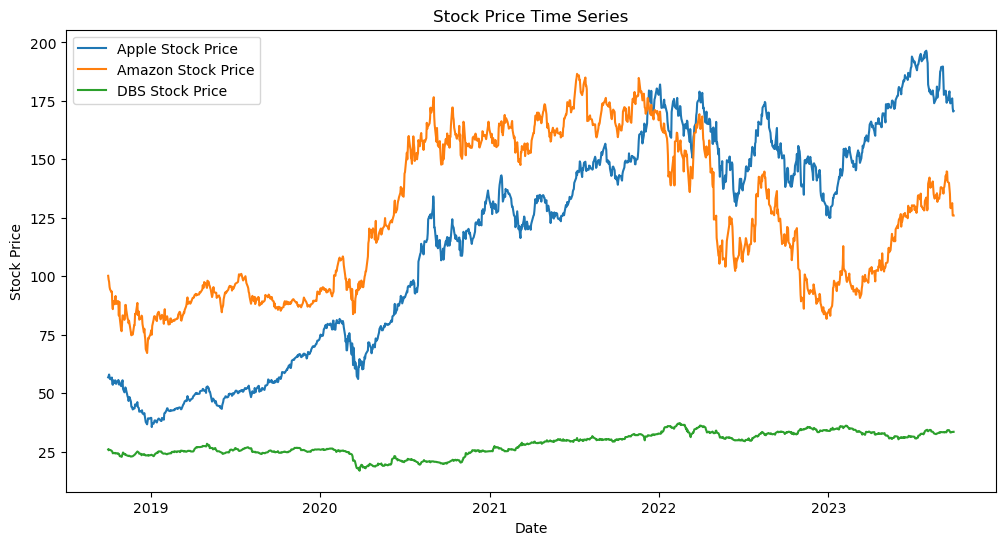

In [9]:
# Visualize the time series data
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Apple'], label='Apple Stock Price')
plt.plot(df.index, df['Amazon'], label='Amazon Stock Price')
plt.plot(df.index, df['DBS'], label='DBS Stock Price')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price Time Series')
plt.legend()
plt.show()


<b><u>Observations</u></b>

From the graph above, we can observe that all DBS, Apple and Amazon stock prices does not seem have a clear seasonal trend, but have somewhat of an upward trend from 2019 to 2023

It is also interesting to note that the shape of the graphs of Apple and Amazon look very similar which means the performance of the Apple and Amazon stock price may be related as both Apple and Amazon are in the Information Technology sector 

Note that anomalies can be both positive and negative hence, anomalies can be better spotted in other methods of analysis which is used later

<h4>Univariate Analysis</h4>
<hr></hr>
Analysing distribution of each variable

<b><u>Observation</u></b>

Stock prices (APPL, AMZN, D05.SI) display a bimodal distribution, indicating two prominent set of values for all 3 stocks from 2018 to 2023.
<ul><li>The minimum Apple stock price from 2018 to 2023 is 35.547501 

 and the maximum Apple stock price from 2018 to 2023 is 196.449997  </li>

<li>The minimum Amazon stock price from 2018 to 2023 is 67.197998 

 and the maximum Amazon stock price from 2018 to 2023 is 186.570496</li>

<li>The minimum DBS stock price from 2018 to 2023 is 16.879999 

 and the maximum DBS stock price from 2018 to 2023 is 37.25</li>
</ul>

However when separating all 3 stocks into different time periods shows... 



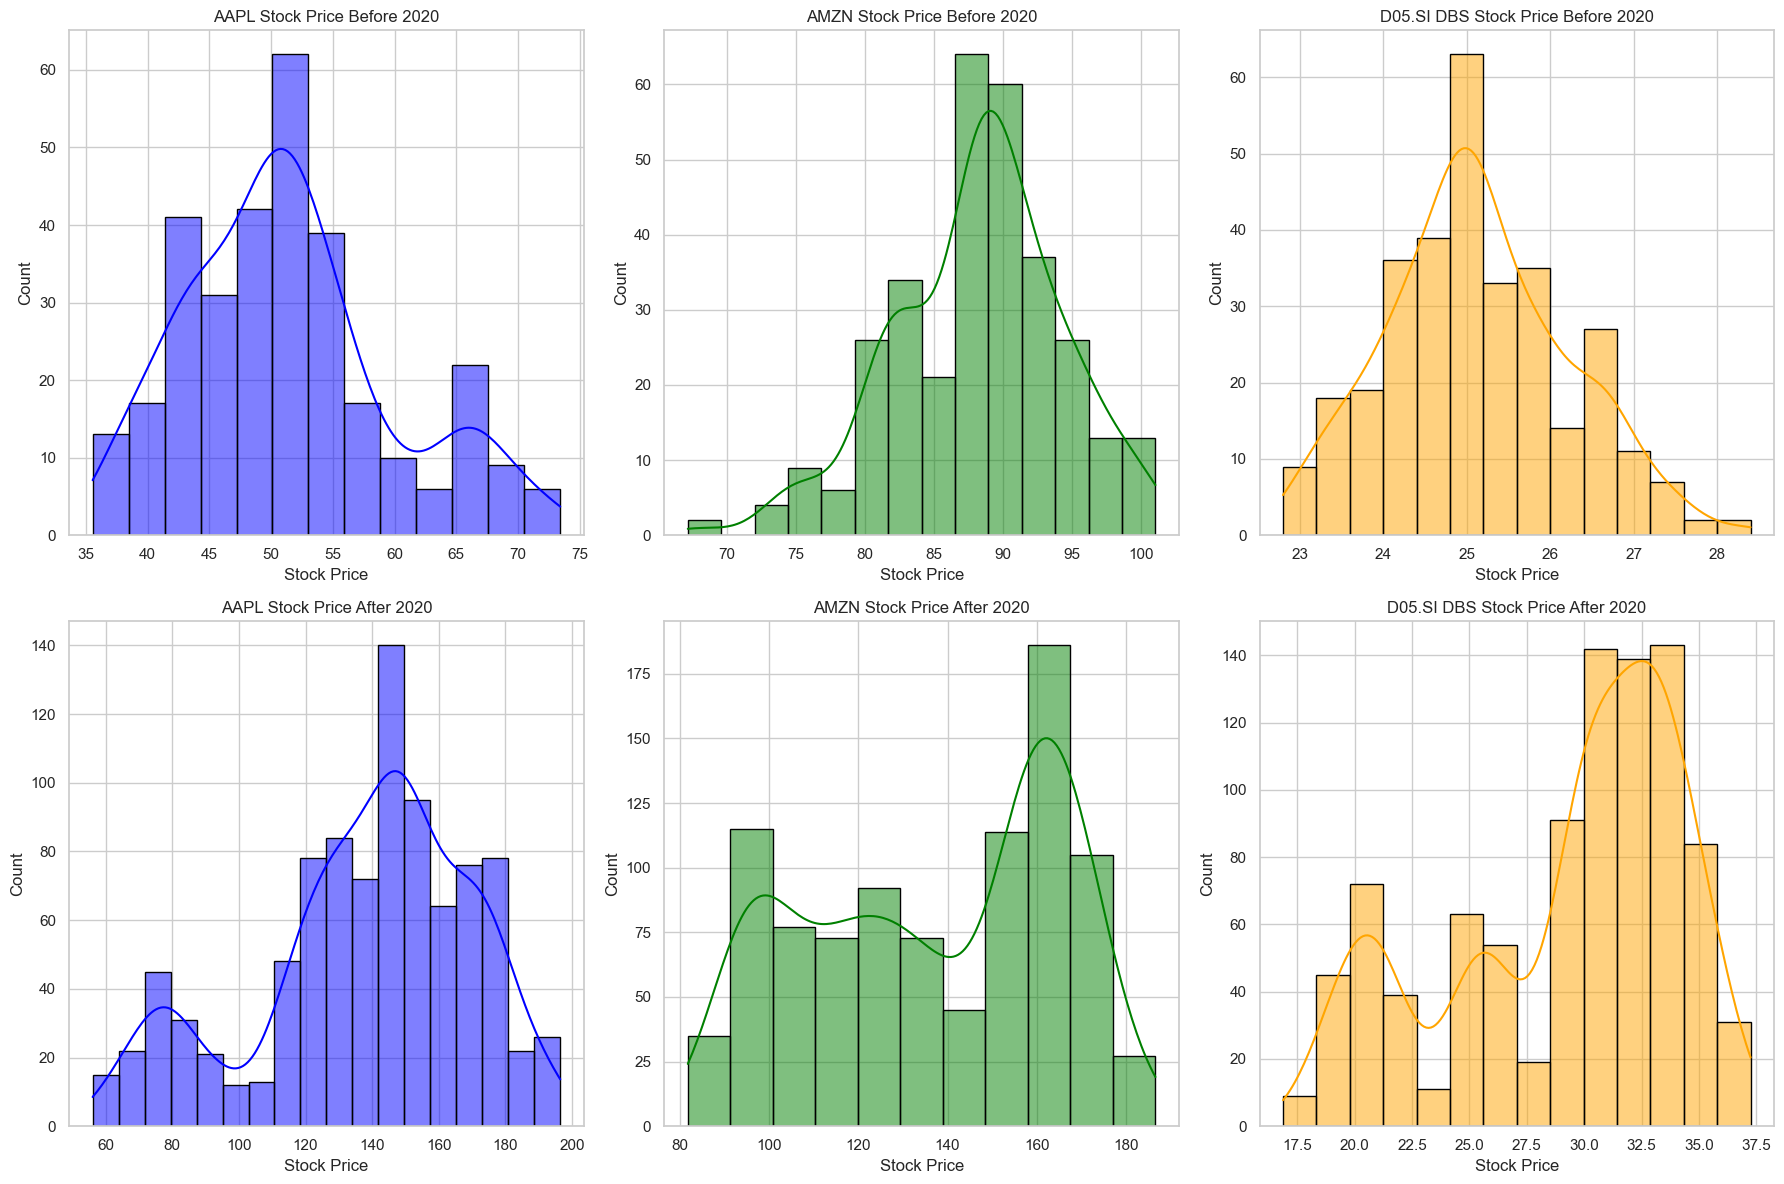

In [10]:
# Create DataFrames for before and after 2020
df_before2020 = df[df.index < '2020-01-01']
df_after2020 = df[df.index >= '2020-01-01']

# Set the style for seaborn
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))

# Plot histograms for Apple stock before 2020
sns.histplot(df_before2020['Apple'], color='blue', edgecolor='black', kde=True, ax=axes[0, 0])
axes[0, 0].set_title('AAPL Stock Price Before 2020')
axes[0, 0].set_xlabel('Stock Price')

# Plot histograms for Amazon stock before 2020
sns.histplot(df_before2020['Amazon'], color='green', edgecolor='black', kde=True, ax=axes[0, 1])
axes[0, 1].set_title('AMZN Stock Price Before 2020')
axes[0, 1].set_xlabel('Stock Price')

# Plot histograms for DBS stock before 2020
sns.histplot(df_before2020['DBS'], color='orange', edgecolor='black', kde=True, ax=axes[0, 2])
axes[0, 2].set_title('D05.SI DBS Stock Price Before 2020')
axes[0, 2].set_xlabel('Stock Price')

# Plot histograms for Apple stock after 2020
sns.histplot(df_after2020['Apple'], color='blue', edgecolor='black', kde=True, ax=axes[1, 0])
axes[1, 0].set_title('AAPL Stock Price After 2020')
axes[1, 0].set_xlabel('Stock Price')

# Plot histograms for Amazon stock after 2020
sns.histplot(df_after2020['Amazon'], color='green', edgecolor='black', kde=True, ax=axes[1, 1])
axes[1, 1].set_title('AMZN Stock Price After 2020')
axes[1, 1].set_xlabel('Stock Price')

# Plot histograms for DBS stock after 2020
sns.histplot(df_after2020['DBS'], color='orange', edgecolor='black', kde=True, ax=axes[1, 2])
axes[1, 2].set_title('D05.SI DBS Stock Price After 2020')
axes[1, 2].set_xlabel('Stock Price')

# Adjust layout to prevent overlapping titles
plt.tight_layout()

# Show the plot
plt.show()

<b><u>Observations</u></b>

Apple (Before 2020) 

<ul>
<li>The stock price distribution seems to be positively skewed</li>
<li>On most days, the stock price was between 50 and 52.5 USD</li>
<li>There is also a small spike in distribution when the stock price is between 65 and 67.5 USD</li>
</ul>

Amazon (Before 2020)
<ul>
<li>The stock price distribution seems to be negatively skewed</li>
<li>On most days, the stock price was between 87.5 and 90 USD</li>
<li>There are outliers when the stock price is very high, between 67.5 to 70 USD</li>
</ul>

DBS (Before 2020) 

<ul>
<li>The stock price distribution is slightly positively skewed</li>
<li>On most days, the stock price was between 24.5 and 25.5 SGD</li>
<li>There are outliers where the stock price is very low, between 27.5 to 28.5 SGD</li>
</ul>

Apple (After 2020) 
<ul>
<li>The stock price distribution seems to be negatively skewed</li>
<li>On most days, the stock price was between 140 and 155 USD</li>
<li>There is also a seemingly large spike in distribution when the stock price is between 80 and 85 USD</li>
</ul>

Amazon (After 2020)
<ul>
<li>The stock price distribution seems to be negatively skewed</li>
<li>On most days, the stock price was between 150 and 170 USD</li>
<li>There are outliers when the stock price is very high at about 180 or more USD</li>
</ul>

DBS (After 2020) 

<ul>
<li>The stock price distribution is negatively skewed</li>
<li>On most days, the stock price was between 30 and 35 SGD</li>
<li>There are outliers where the stock price is very low at about +-17.5 SGD
</ul>

<h4>Bivariate Analysis</h4>
<hr></hr>
Analysing the relationships between the different variables.

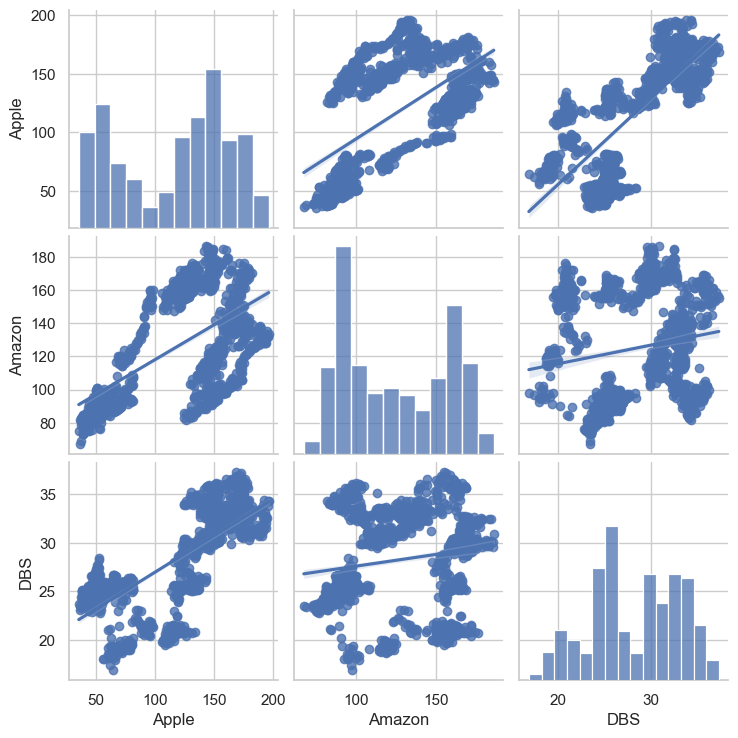

In [11]:
# Pairplot
sns.pairplot(df, kind='reg')
plt.show()

<b><u>Observations</u></b>

Apple against Amazon and Apple against DBS follow a similar trend, with both of them increasing together, however Amazon against DBS, DBS is increasing at a slower rate as compared to the other 2 stocks

<h5>Checking for correlation between variables</h5>

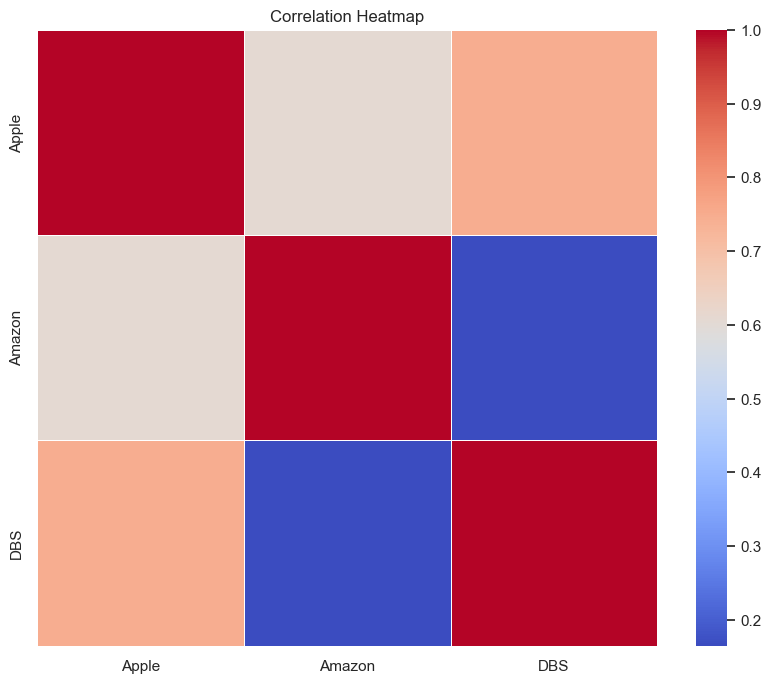

In [12]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap with the correlation matrix
sns.heatmap(correlation_matrix,  cmap="coolwarm", linewidths=.5)

# Set the title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()


<b><u>Observation</u></b>

The correlation heatmap shows that there is a strong correlation between Apple and DBS stock price while having a moderate correlation between Apple and Amazon stock price

<hr></hr>
<h3>Data Preprocessing</h3>
<hr></hr>


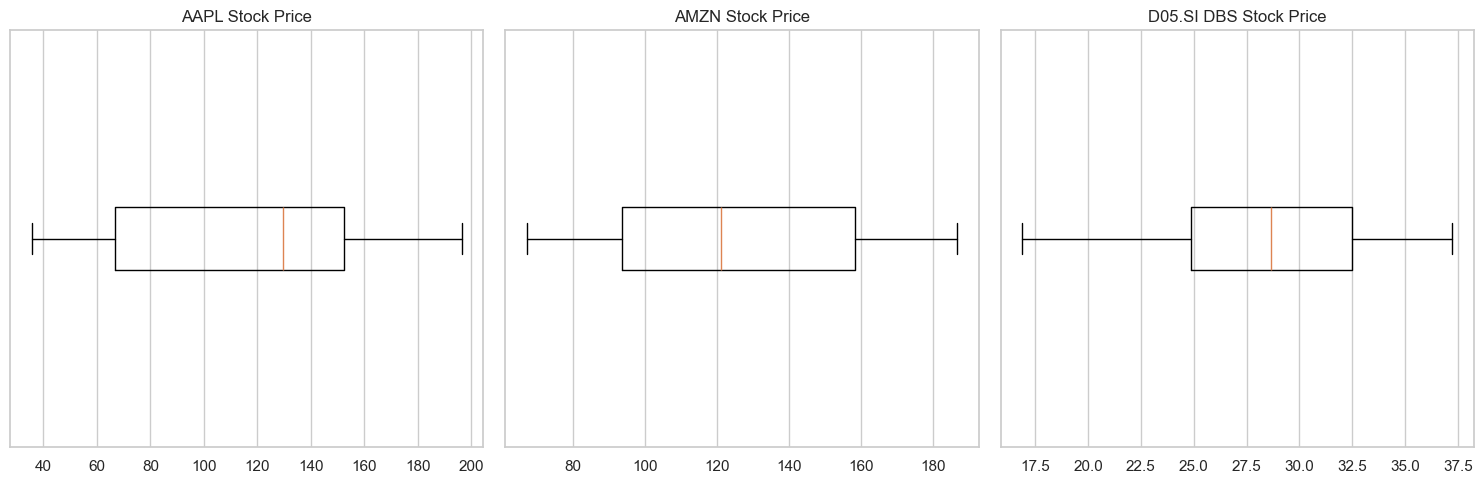

In [13]:
# Create boxplots
plt.figure(figsize=(15, 5))

# Apple stock
plt.subplot(1, 3, 1)
plt.boxplot(df['Apple'], vert=False)
plt.title('AAPL Stock Price')
plt.yticks([])

# Amazon stock
plt.subplot(1, 3, 2)
plt.boxplot(df['Amazon'], vert=False)
plt.title('AMZN Stock Price')
plt.yticks([])

# DBS stock
plt.subplot(1, 3, 3)
plt.boxplot(df['DBS'], vert=False)
plt.title('D05.SI DBS Stock Price')
plt.yticks([])

plt.tight_layout()
plt.show()

As we can see there are no outliers so this means that the dataset is relatively free from extreme values that significantly deviate from the overall pattern.

So we can move on to the next step which is...

In [14]:
df_scaled=df.copy()
# Standardisation
scaler = StandardScaler()

# Fit the scaler on the selected columns and transform the data
df_scaled[['Apple','Amazon','DBS']] = scaler.fit_transform(df_scaled[['Apple','Amazon','DBS']])
print(df_scaled)

               Apple    Amazon       DBS
Date                                    
2018-10-01 -1.264805 -0.756495 -0.467793
2018-10-02 -1.254044 -0.807368 -0.539571
2018-10-03 -1.239180 -0.835922 -0.472015
2018-10-04 -1.260916 -0.902633 -0.512126
2018-10-05 -1.280628 -0.933065 -0.510015
...              ...       ...       ...
2023-09-22  1.249211  0.133262  1.069095
2023-09-25  1.276701  0.199451  1.111317
2023-09-26  1.188905  0.036597  1.123983
2023-09-27  1.156301  0.036597  1.107094
2023-09-28  1.161842  0.036597  1.121872

[1257 rows x 3 columns]


<hr></hr>
<h3>Time Series Analysis</h3>
<hr></hr>
Tests being conducted are 
<ol>
    <li>Augmented Dickey-Foller Test - Test for Stationarity</li>
    <li>Seasonal Decomposition - Test for trends, seasonality and residual </li>
</ol>

<h4>Dickey Fuller Test for Stationarity</h4>
<hr></hr>

<ul>
<li>The time-series needs to be stationary to model a time-series using ARMA models.</li>

<li>We do this to ensure the mean, variance and covariance does not vary with time. To check for stationarity, </li>
<li>if p-value<0.05, time series is stationary 

else if p-value>=0.05, time series is non stationary and needs to be differenced.</li></ul>

Apple p-value: 0.765069
Amazon p-value: 0.458653
DBS p-value: 0.655680
               Apple    Amazon       DBS
Date                                    
2018-10-02  0.505001 -1.652504 -0.340000
2018-10-03  0.697502 -0.927498  0.320002
2018-10-04 -1.020001 -2.166999 -0.190001
2018-10-05 -0.925003 -0.988503  0.010000
2018-10-08 -0.129997 -1.261497 -0.300001
...              ...       ...       ...
2023-09-22  0.860000 -0.210007  0.029999
2023-09-25  1.290009  2.150009  0.200001
2023-09-26 -4.119995 -5.290001  0.059997
2023-09-27 -1.530014  0.000000 -0.079998
2023-09-28  0.260009  0.000000  0.070000

[1256 rows x 3 columns]
Apple after differencing p-value: 0.000000
Amazon after differencing p-value: 0.000000
DBS after differencing p-value: 0.000000


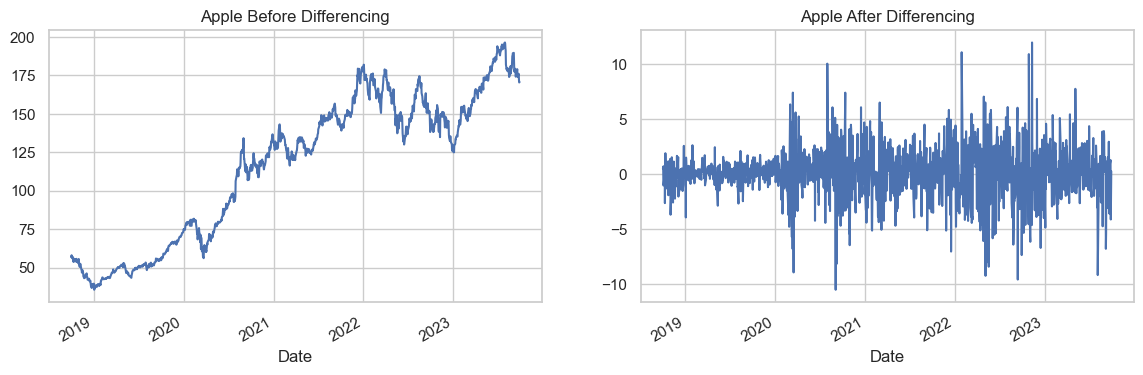

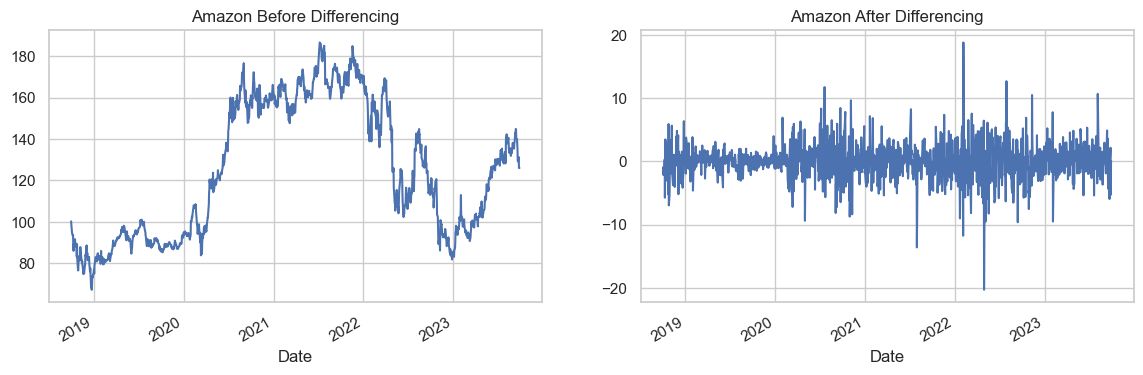

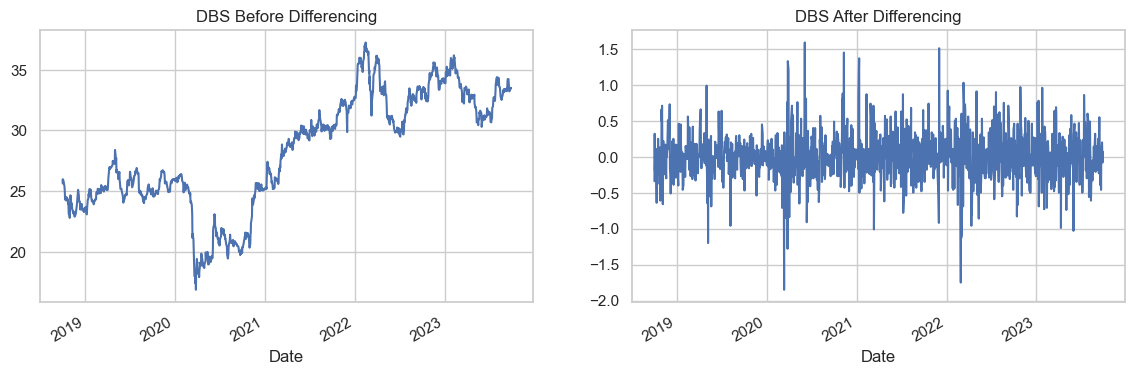

In [15]:
# Augmented Dickey-Fuller Test
result_stock1 = adfuller(df['Apple'])
result_stock2 = adfuller(df['Amazon'])
result_stock3 = adfuller(df['DBS'])

print('Apple p-value: %f' % result_stock1[1])
print('Amazon p-value: %f' % result_stock2[1])
print('DBS p-value: %f' % result_stock3[1])

# Step 3.2: Make Time Series Stationary by Differencing
df_diff_stock1 = diff(df['Apple'])
df_diff_stock2 = diff(df['Amazon'])
df_diff_stock3=diff(df['DBS'])

df_diff=df.copy()
df_diff['Apple']=df_diff_stock1
df_diff['Amazon']=df_diff_stock2
df_diff['DBS']=df_diff_stock3
df_diff = df_diff.iloc[1:]
print(df_diff)

result_diff_stock1 = adfuller(df_diff['Apple'])
result_diff_stock2 = adfuller(df_diff['Amazon'])
result_diff_stock3 = adfuller(df_diff['DBS'])

print('Apple after differencing p-value: %f' % result_diff_stock1[1])
print('Amazon after differencing p-value: %f' % result_diff_stock2[1])
print('DBS after differencing p-value: %f' % result_diff_stock3[1])

fig, ax = plt.subplots(1, 2, figsize=(14, 4))
df['Apple'].plot(ax=ax[0])
df_diff_stock1.plot(ax=ax[1])
ax[0].set_title('Apple Before Differencing')
ax[1].set_title('Apple After Differencing')
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(14, 4))
df['Amazon'].plot(ax=ax[0])
df_diff_stock2.plot(ax=ax[1])
ax[0].set_title('Amazon Before Differencing')
ax[1].set_title('Amazon After Differencing')
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(14, 4))
df['DBS'].plot(ax=ax[0])
df_diff_stock3.plot(ax=ax[1])
ax[0].set_title('DBS Before Differencing')
ax[1].set_title('DBS After Differencing')
plt.show()

<b><u>Observations</u></b>

As all p-values of these stocks are >0.05, we cannot reject the null hypothesis.

Therefore the time series is non-stationary and are differenced which shows the change in day by day stock price of Apple, Amazon and DBS which shows days of positive and negative anomalies very clearly.

<h4>Seasonal Decomposition </h4>
<hr></hr>
Test for trends, seasonality and residual

In [16]:
# Imputing missing dates and their data
# Generate a complete date range
complete_date_range = pd.date_range(start='2018-10-01', end='2023-09-28')

# Reindex the DataFrame
df1=df.copy()
df1 = df1.reindex(complete_date_range)
df1.index.name='Date'

# Display the updated DataFrame
print(df1)

# Perform linear interpolation
df1.interpolate(method='linear', inplace=True)

# Display the updated DataFrame
df1.head(10)

# Athough this may to lead to some inaccurate data, 
# this needs to be done to have a complete set of dates when using functions like 'seasonal_decompose' which relys on a regular time interval

                 Apple      Amazon        DBS
Date                                         
2018-10-01   56.814999  100.218002  25.969999
2018-10-02   57.320000   98.565498  25.629999
2018-10-03   58.017502   97.638000  25.950001
2018-10-04   56.997501   95.471001  25.760000
2018-10-05   56.072498   94.482498  25.770000
...                ...         ...        ...
2023-09-24         NaN         NaN        NaN
2023-09-25  176.080002  131.270004  33.450001
2023-09-26  171.960007  125.980003  33.509998
2023-09-27  170.429993  125.980003  33.430000
2023-09-28  170.690002  125.980003  33.500000

[1824 rows x 3 columns]


,Apple,Amazon,DBS
Date,,,
2018-10-01,56.814999,100.218002,25.969999
2018-10-02,57.320000,98.565498,25.629999
2018-10-03,58.017502,97.638000,25.950001
2018-10-04,56.997501,95.471001,25.760000
2018-10-05,56.072498,94.482498,25.770000
2018-10-06,56.029166,94.061999,25.670000
2018-10-07,55.985833,93.641500,25.569999
2018-10-08,55.942501,93.221001,25.469999
2018-10-09,56.717499,93.515999,25.260000


Date
2018-10-01   -0.055945
2018-10-02    0.082927
2018-10-03    0.149690
2018-10-04   -0.026553
2018-10-05   -0.046826
2018-10-06   -0.050448
2018-10-07   -0.052845
Freq: D, Name: seasonal, dtype: float64

Therefore, Seasonal Period for AAPL stock is 7 days


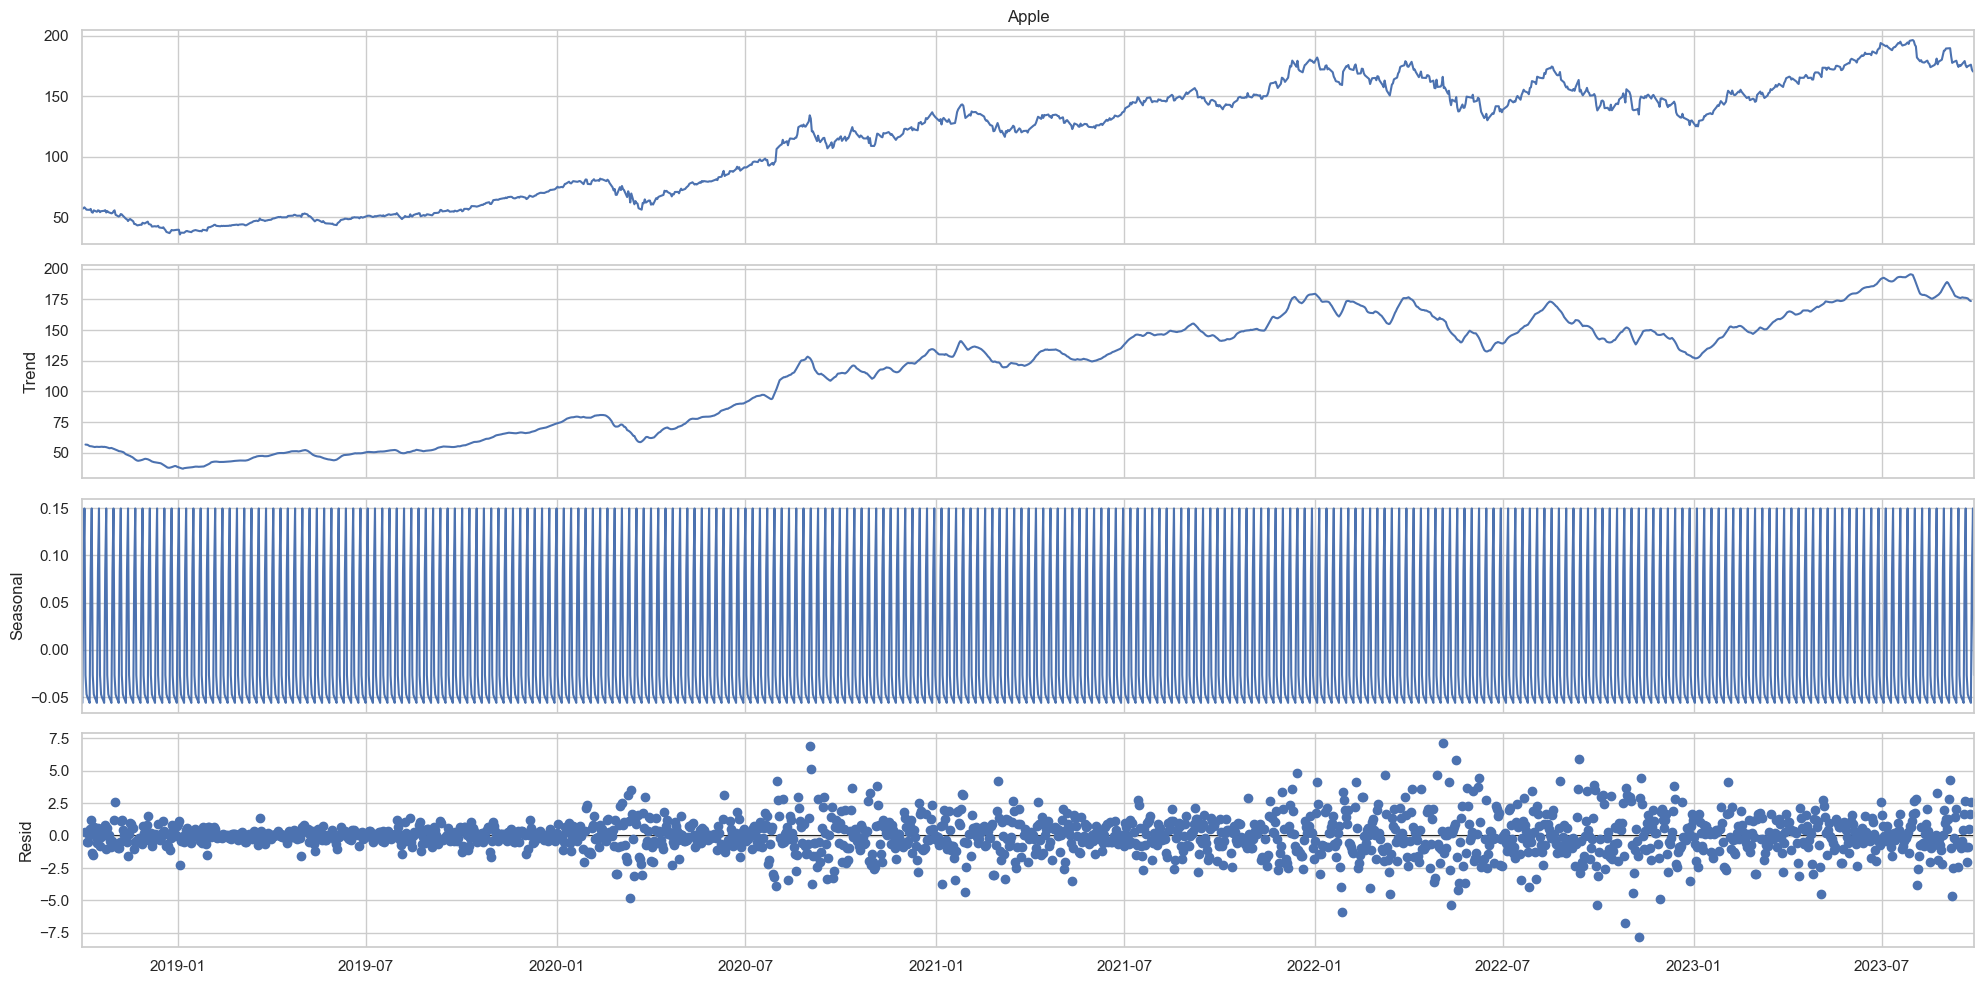

Date
2018-10-01   -0.094190
2018-10-02    0.044261
2018-10-03    0.195424
2018-10-04    0.170282
2018-10-05   -0.111644
2018-10-06   -0.105089
2018-10-07   -0.099045
Freq: D, Name: seasonal, dtype: float64

Therefore, Seasonal Period for AMZN stock is 7 days


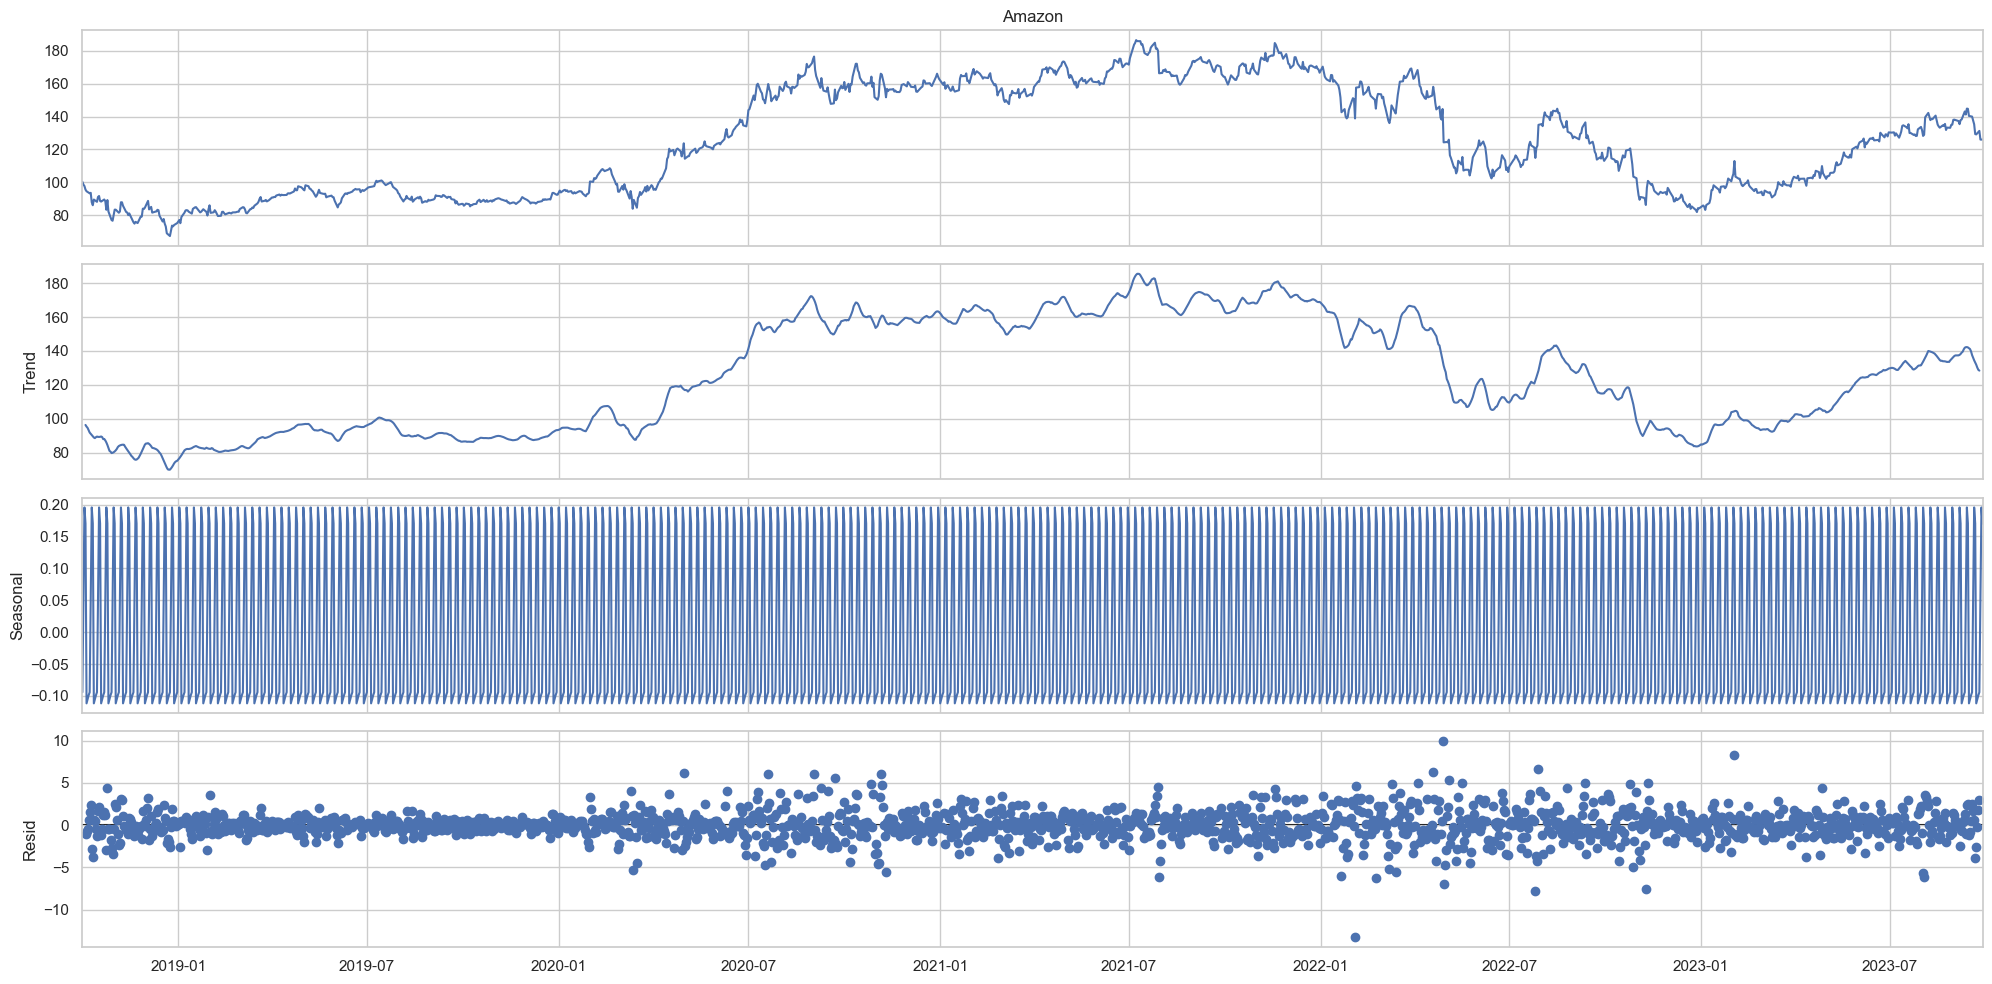

Date
2018-10-01    0.007773
2018-10-02    0.000813
2018-10-03   -0.015258
2018-10-04   -0.009146
2018-10-05    0.004061
2018-10-06    0.005200
2018-10-07    0.006558
Freq: D, Name: seasonal, dtype: float64

Therefore, Seasonal Period for DBS stock is 7 days


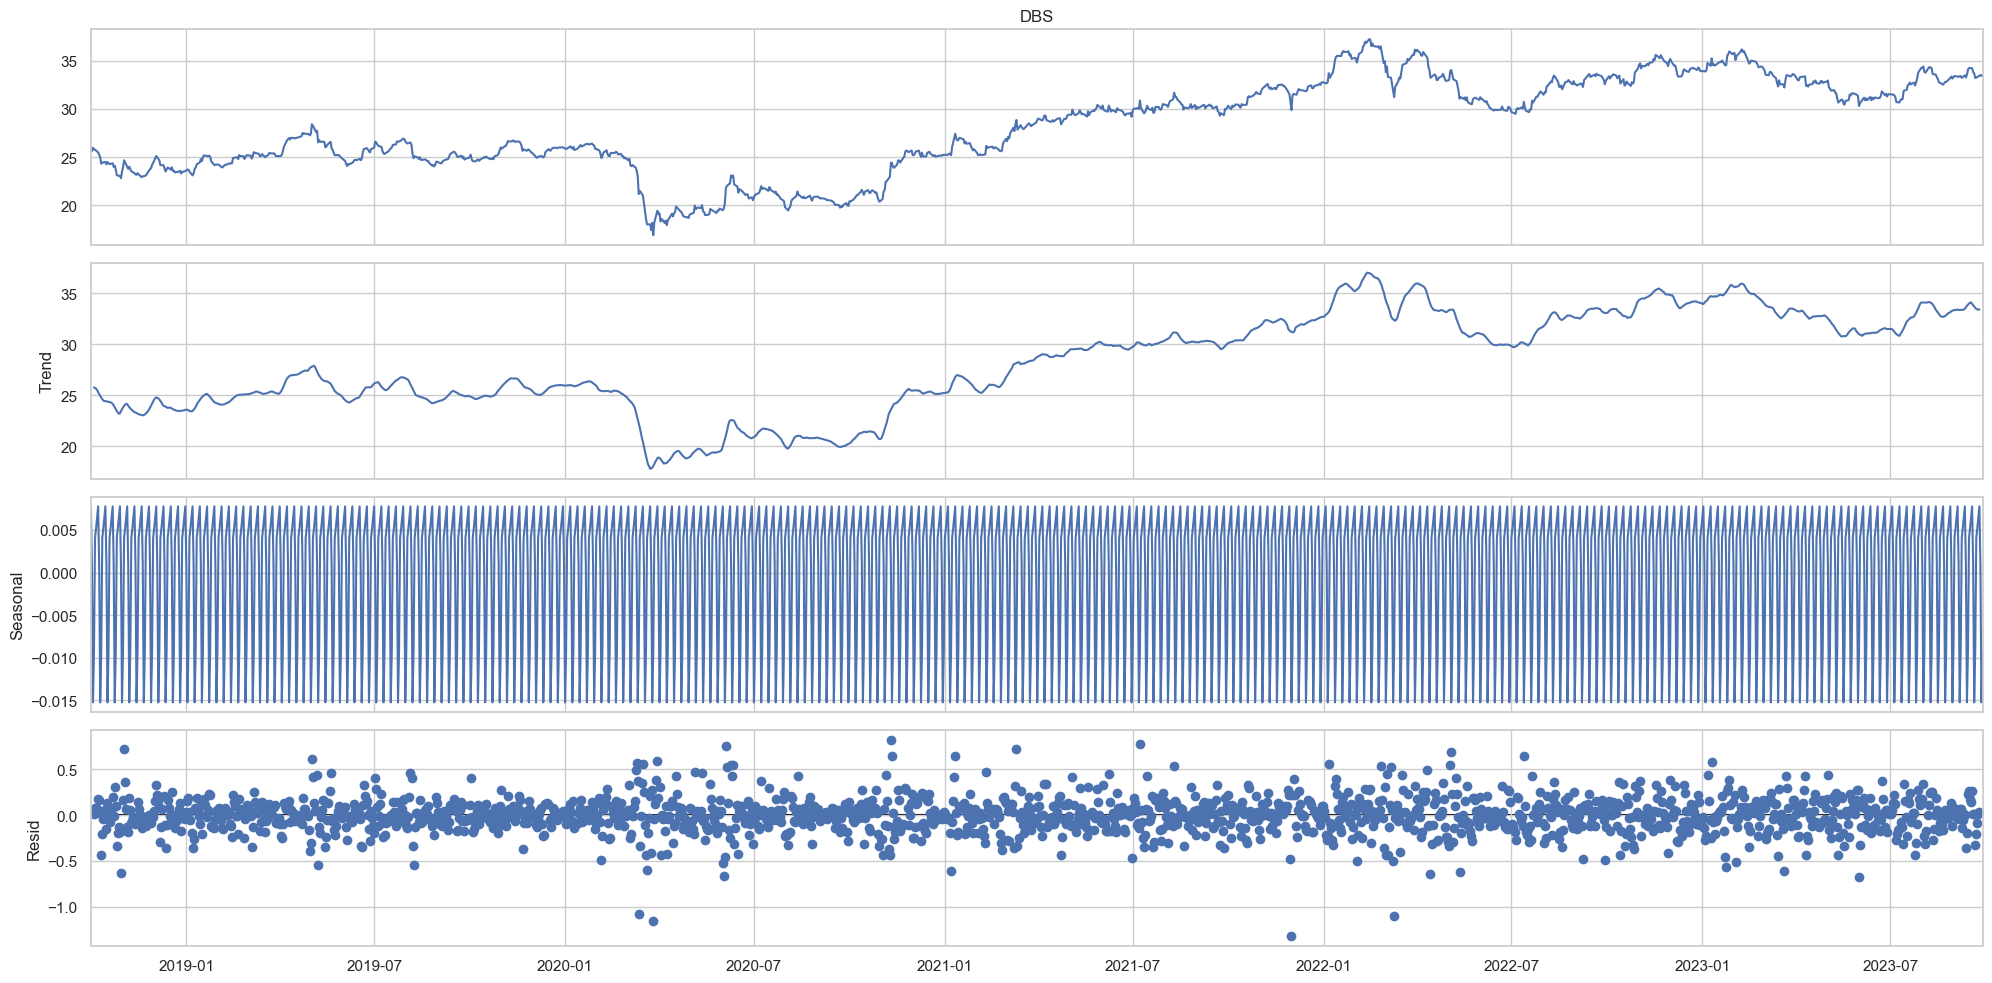

In [17]:
# Creating seasonal decomposition plot
plt.rc("figure", figsize=(20, 10))

decompostion1=seasonal_decompose(df1['Apple'], model='additive')
interval1=decompostion1.seasonal.drop_duplicates()
print(interval1)
print(f'\nTherefore, Seasonal Period for AAPL stock is {len(interval1)} days')
decompostion1.plot()
plt.show()


decompostion2=seasonal_decompose(df1['Amazon'], model='additive')
interval2=decompostion2.seasonal.drop_duplicates()
print(interval2)
print(f'\nTherefore, Seasonal Period for AMZN stock is {len(interval2)} days')
decompostion2.plot()
plt.show()

decompostion3=seasonal_decompose(df1['DBS'], model='additive')
interval3=decompostion3.seasonal.drop_duplicates()
print(interval3)
print(f'\nTherefore, Seasonal Period for DBS stock is {len(interval3)} days')
decompostion3.plot()
plt.show()


<b><u>Observations</u></b>

<ul>
<li>Apple and DBS stock prices seem to have a positive linear trend</li>
<li>Amazon stock does not have a linear trend</li>
<li>Seasonality stays constant throughtout all 3 variables at 7 which means it repeats weekly</li>
<li>The seasonal periods are intervals of 7 days however taking into account that I have imputed, this means that the seasonal period should actually be 5 days in a week</li>
<li>However, as models work better with daily data, i would be using 7 for seasonal</li>
</ul>

<h4>AutoCorrelation Analysis</h4>
<hr></hr>
<b>ACF (AutoCorrelation Function):</b>

ACF measures the correlation between a time series and its lagged values (previous observations).

<b>PACF (Partial AutoCorrelation Function):</b>

Definition: PACF measures the correlation between a time series and its lagged values, but with the influence of shorter lags removed.

Both ACF and PACF are essential in determining the order of autoregressive (AR) and moving average (MA) components when building time series models, such as ARIMA 

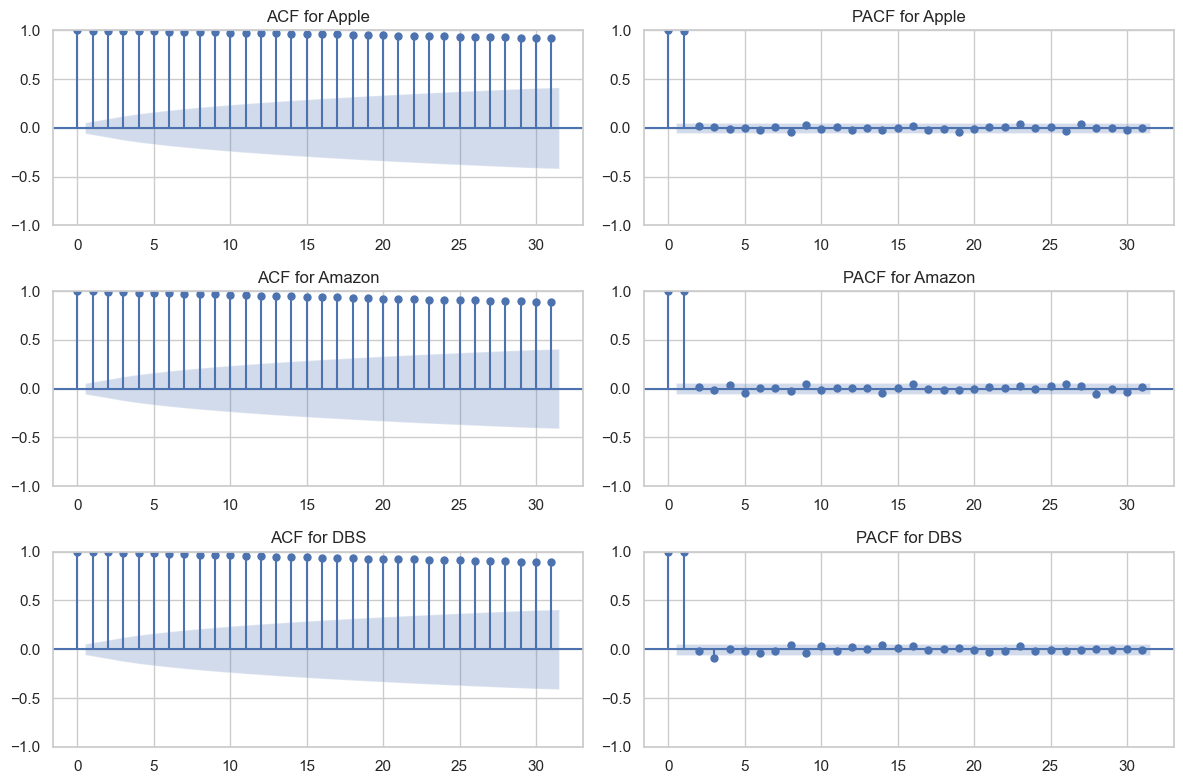

In [18]:
# Autocorrelation and Partial Autocorrelation
# Plot ACF for each column
fig, axes = plt.subplots(3, 2, figsize=(12, 8))

# Plot ACF and PACF for 'Apple'
plot_acf(df['Apple'], title='ACF for Apple', ax=axes[0, 0])
plot_pacf(df['Apple'], title='PACF for Apple', ax=axes[0, 1])

# Plot ACF and PACF for 'Amazon'
plot_acf(df['Amazon'], title='ACF for Amazon', ax=axes[1, 0])
plot_pacf(df['Amazon'], title='PACF for Amazon', ax=axes[1, 1])

# Plot ACF and PACF for 'DBS'
plot_acf(df['DBS'], title='ACF for DBS', ax=axes[2, 0])
plot_pacf(df['DBS'], title='PACF for DBS', ax=axes[2, 1])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

ACF (AutoCorrelation Function):
<ul>
<li>
<b>The ACF starts from 1</b>

 This means that the correlation between the time series values and their first lag indicates there is a strong positive correlation between each data point to the next.</li><li>
<b>ACF decays slowly over lags</b>

 As you move to higher lags, autocorrelation values gradually decrease. The autocorrelation with earlier time points diminishes, but it does so at a slow pace, indicating a long-range dependence or persistence in the time series.
</li>

</ul>

PACF (Partial AutoCorrelation Function):

<ul>
<li>
<b>Spike at lag 0 and lag 1</b>

 The PACF shows a significant spike or peak at lag 0 and another spike at lag 1. This suggests that there is a direct and strong correlation between the current observation and the observations at lags 0 and 1, with the influence of other lags removed.</li>
<li></b>Drops to near 0 afterward</b>

 Beyond lag 1, the partial correlation drops sharply and approaches zero. This implies that once the direct influence of the first and second lags is considered, there is little correlation with subsequent lags. The spikes at lag 0 and lag 1 are the primary contributors to the autocorrelation structure.
</li>
</ul>
This means we should use AR1 model as the number of significant spikes in PACF beside when lag 0 is 0

<hr></hr>
<h3>Train-test Split, Data Sampling</h3>
<hr></hr>
Using Expanding Windows which trains and evaluates the model many times for each dataset.

Finding min RMSE and MAPE

In [19]:
# Split data into train and test
train_data = df1.iloc[:-80]
test_data = df1.iloc[-80:]


# Function to evaluate model
def expanding_window(model, endog, test_size=80, n_splits=3, **kwargs):
    tscv = TimeSeriesSplit(test_size=test_size, n_splits = n_splits)
    rmse_hist = []
    mape_hist = []
    aic_hist = []
    for idx, (train_index, test_index) in enumerate(tscv.split(endog)):
        warnings.filterwarnings("ignore")
        res = model(endog.iloc[train_index], **kwargs).fit()
        yhat = res.forecast(test_size)
        ytrue = endog.iloc[test_index]
        rmse_hist.append(mean_squared_error(ytrue, yhat, squared=False))
        mape_hist.append(mean_absolute_percentage_error(ytrue, yhat))
        aic_hist.append(res.aic)
    return np.array(rmse_hist).mean(), np.array(mape_hist).mean(), np.array(aic_hist).mean()

<hr></hr>
<h3>Model Selection and Hyperparameter Tuning</h3>
<hr></hr>

There are many available models to forecast time series which are:

<ul>
<li>ARIMA</li>
<li>SARIMA</li>
<li>Holt-Winters Exponential Smoothing</li>
<li>VARMA</li>
</ul>

For our models, we will be using a gridsearch for each of them to determine the optimal parameters by looking at mean absolute percentage error (MAPE) to determine the best model. 

<h4>Baseline Model - Average Forecast</h4>

We must create a baseline model to serve as an additional benchmark for assessing the performance of our constructed model. The baseline model, utilizing a straightforward Average Forecast, predicts the current observation by relying on the mean of historical data.


$$\text{Average Forecast} = \frac{1}{n} \sum_{i=1}^{n} \text{Forecast}_{i}$$

In [20]:
def expanding_window_baseline(endog:pd.Series, test_size=80, n_splits=3):
    tscv = TimeSeriesSplit(test_size=test_size, n_splits = n_splits)
    rmse_hist = []
    mape_hist = []
    
    for iters, (train_index, test_index) in enumerate(tscv.split(endog)):     
        train = endog.iloc[train_index]
        test = endog.iloc[test_index]
        yhat = pd.Series(train.mean()).repeat(test_size)
        
        rmse_hist.append(mean_squared_error(test.values, yhat.values, squared=False))
        mape_hist.append(mean_absolute_percentage_error(test.values, yhat.values))

    return np.array(rmse_hist).mean(), np.array(mape_hist).mean()

base_hist = dict()
for var in df.columns:
    base_hist[var] = expanding_window_baseline(endog=train_data[var])

pd.DataFrame(base_hist, index = ['baseline_rmse', 'baseline_mape']).T

,baseline_rmse,baseline_mape
Apple,50.858904,0.310390
Amazon,24.693818,0.247425
DBS,5.894906,0.172990


<h4>ARIMA Model</h4>
<hr></hr>

ARIMA (Autoregressive Integrated Moving Average) is a time series forecasting model that leverages autoregressive and moving average elements, coupled with differencing, to predict future values. By analyzing historical data and accounting for its own past values and weighted averages of prediction errors, ARIMA accommodates data stationarity through differencing. This widely applied model is instrumental in forecasting trends for time-dependent data across various domains.

As none of them are stationary, d parameter would be 1 foe all non stationaries

In [21]:
arima_Apple_stock = dict()

for p in tqdm(range(5)):
    for q in range(5):
            rmse, mape, aic = expanding_window(ARIMA, train_data['Apple'], order=(p,1,q))
            arima_Apple_stock['({},{},{})'.format(p,1,q)] = [rmse, mape, aic]
            
pd.DataFrame(arima_Apple_stock).T.rename(columns = {0:"RMSE", 1:"MAPE", 2:"AIC"}).sort_values(["MAPE"]).head(10)

100%|██████████| 5/5 [00:33<00:00,  6.78s/it]


,RMSE,MAPE,AIC
"(4,1,1)",13.894713,0.074384,6410.325765
"(1,1,4)",13.895841,0.074390,6410.278412
"(4,1,3)",13.903301,0.074437,6409.506802
"(1,1,3)",13.918378,0.074548,6409.216363
"(2,1,4)",13.924659,0.074583,6406.523129
"(4,1,2)",13.930919,0.074628,6406.409171
"(3,1,2)",13.932772,0.074656,6411.349186
"(4,1,0)",13.935213,0.074679,6408.773305
"(2,1,2)",13.930328,0.074704,6406.453231
"(0,1,4)",13.941821,0.074728,6408.789662


In [22]:
arima_Amazon_stock = dict()

for p in tqdm(range(5)):
    for q in range(5):
            rmse, mape, aic = expanding_window(ARIMA, train_data['Amazon'], order=(p,1,q))
            arima_Amazon_stock['({},{},{})'.format(p,1,q)] = [rmse, mape, aic]
            
pd.DataFrame(arima_Amazon_stock).T.rename(columns = {0:"RMSE", 1:"MAPE", 2:"AIC"}).sort_values(["MAPE"]).head(10)

  0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 5/5 [00:29<00:00,  5.93s/it]


,RMSE,MAPE,AIC
"(3,1,3)",10.338365,0.082879,7044.170597
"(3,1,2)",10.330168,0.083056,7043.934564
"(1,1,3)",10.353138,0.083209,7042.447529
"(0,1,0)",10.374382,0.083354,7039.873844
"(0,1,1)",10.374508,0.083384,7041.679825
"(1,1,0)",10.374735,0.083389,7041.661341
"(4,1,4)",10.379463,0.083448,7046.408008
"(2,1,2)",10.371743,0.083534,7042.127782
"(2,1,3)",10.398801,0.083830,7044.021983
"(0,1,2)",10.404632,0.083916,7040.146153


In [23]:
arima_DBS_stock = dict()

for p in tqdm(range(5)):
    for q in range(5):
            rmse, mape, aic = expanding_window(ARIMA, train_data['DBS'], order=(p,1,q))
            arima_DBS_stock['({},{},{})'.format(p,1,q)] = [rmse, mape, aic]
            
pd.DataFrame(arima_DBS_stock).T.rename(columns = {0:"RMSE", 1:"MAPE", 2:"AIC"}).sort_values(["MAPE"]).head(10)

  0%|          | 0/5 [00:00<?, ?it/s]

 80%|████████  | 4/5 [00:32<00:08,  8.05s/it]


KeyboardInterrupt: 

<b><u>Optimal Parameters</u></b>
 
 <table>
  <tr>
    <th>Stock</th>
    <th>AR(p significant lags)</th>
    <th>I(d integrate lags)</th>
    <th>MA(q significant lags)</th>
    <th>RMSE</th>
    <th>MAPE</th>
    <th>AIC</th>
    <th>Baseline MAPE</th>
  </tr>
  <tr>
    <td>Apple (USD)</td>
    <td>4</td>
    <td>1</td>
    <td>1</td>
    <td>13.894713</td>
    <td>7.4384%</td>
    <td>6410.325765</td>
    <td>0.310390</td>
  </tr>
  <tr>
    <td>Amazon (USD)</td>
    <td>3</td>
    <td>1</td>
    <td>3</td>
    <td>10.338365</td>
    <td>8.2879%</td>
    <td>7044.170597</td>
    <td>0.247425</td>
  </tr>  
  <tr>
    <td>DBS (SGD)</td>
    <td>4</td>
    <td>1</td>
    <td>3</td>
    <td>1.297943</td>
    <td>3.4326%</td>
    <td>228.057413</td>
    <td>0.172990</td>
  </tr>
</table> 

<h5>Plotting out the predictions</h5>

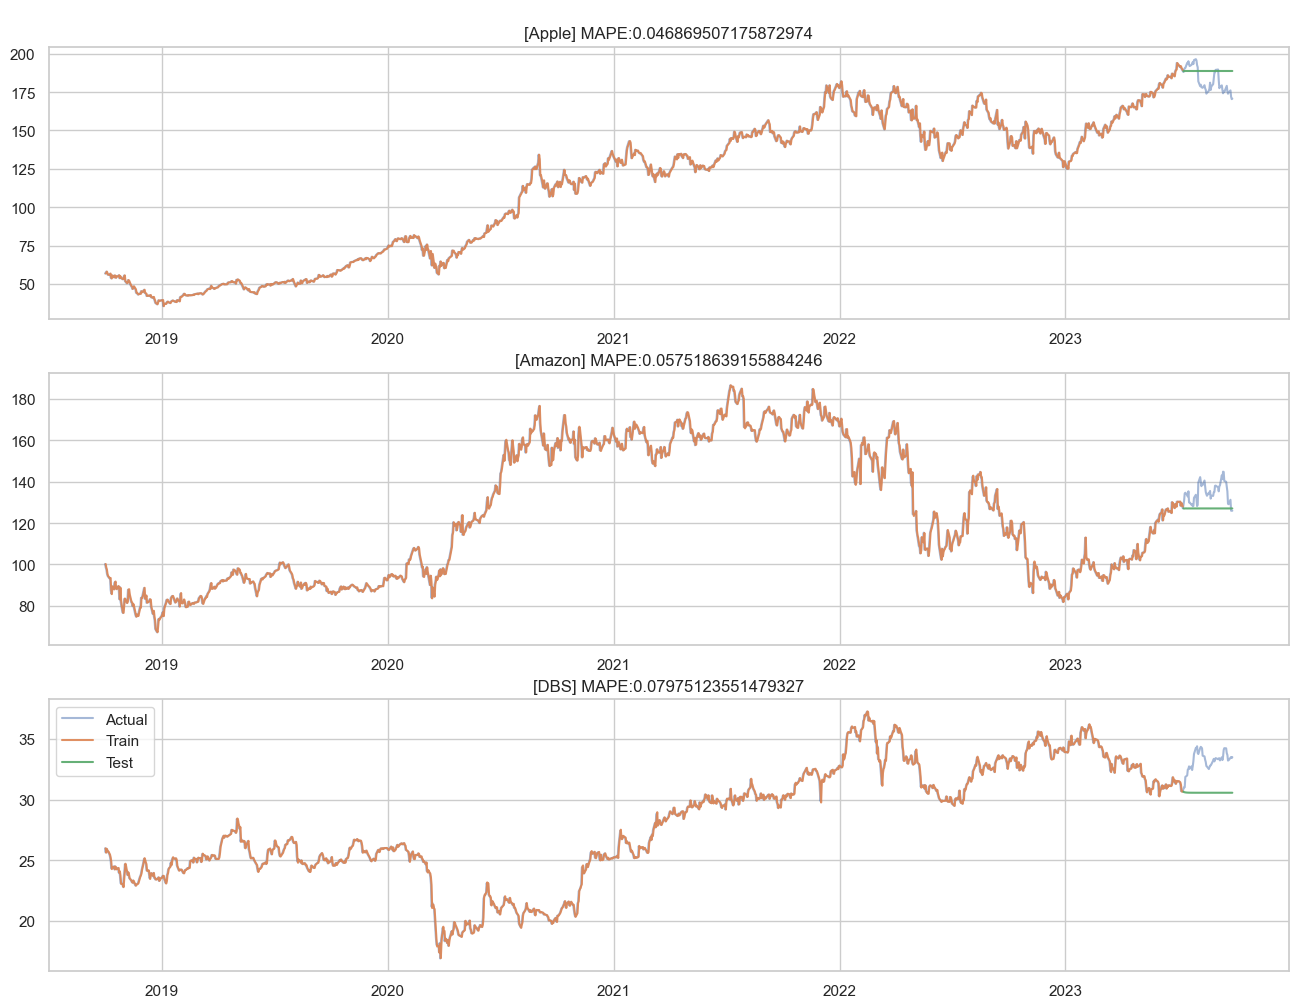

In [ ]:
orders = [(4,1,1),(3,1,3),(4,1,1)]

fig, axes = plt.subplots(3,1, figsize=(16, 12))

for i, order in enumerate(orders):
    model = ARIMA(train_data[df1.columns[i]], order = order)
    res = model.fit()

    full_pred = res.predict()
    pred = res.forecast(80)

    axes[i].set_title("\n[{}] MAPE:{}".format(df1.columns[i], mean_absolute_percentage_error(test_data[df1.columns[i]],pred)))
    axes[i].plot(df1[df1.columns[i]], label = 'Actual', alpha=0.5)
    axes[i].plot(full_pred.iloc[1:], label = 'Train', alpha=0.9)
    axes[i].plot(pred, label='Test', alpha=0.9)
plt.legend()
plt.show()

<u><b>Observations</b></u>

We can see that only Amazon's ARIMA can somewhat predict the endpoint of the Amazon plot, however, all of them are not very good at predict the graph 

<h4>SARIMA</h4>
<hr></hr>
Seasonal ARIMA (SARIMA), an extension of the ARIMA model, integrates seasonality into time series forecasting. Alongside the autoregressive, differencing, and moving average aspects of ARIMA, SARIMA introduces seasonal terms to capture repetitive patterns at defined intervals. This feature proves especially valuable for forecasting data with seasonal fluctuations, such as quarterly sales or monthly temperature changes. By addressing both underlying trends and seasonal patterns, SARIMA improves prediction accuracy for time series data characterized by recurring cycles.

Set set d as 1 due to non-stationarity of all

In [ ]:
sarima_Apple_stock = dict()

# Define Params Space
p_range = range(1,5)
d_range = [1]
q_range = range(1,5)
P_range = range(1,4)
D_range = [1]
Q_range = range(1,4)  
m = [7]

for p, d, q, P, D, Q, m in tqdm(itertools.product(*(p_range, d_range, q_range, P_range, D_range, Q_range, m))):
    try:
        rmse_mape_aic_tuple = expanding_window(SARIMAX, train_data["Apple"], order = (p,d,q), seasonal_order=(P,D,Q,m))
        sarima_Apple_stock[f'({p},{d},{q}),({P},{D},{Q},{m})'] = rmse_mape_aic_tuple
    except:
        continue

pd.DataFrame(sarima_Apple_stock, index=['rmse','mape' ,'aic']).T.sort_values(['mape']).head(10)

0it [00:00, ?it/s]

144it [3:27:45, 86.56s/it]


,rmse,mape,aic
"(4,1,4),(1,1,1,7)",12.978367,0.071359,6416.708053
"(4,1,1),(1,1,1,7)",13.003503,0.071529,6418.579820
"(1,1,4),(1,1,1,7)",13.005927,0.071541,6418.528491
"(3,1,2),(1,1,1,7)",12.985020,0.071551,6416.442320
"(2,1,4),(1,1,1,7)",13.043624,0.071792,6417.492511
"(4,1,2),(1,1,1,7)",13.045510,0.071807,6417.439449
"(1,1,3),(1,1,1,7)",13.047206,0.071830,6417.297472
"(4,1,4),(2,1,3,7)",13.058704,0.071888,6423.776105
"(4,1,3),(2,1,3,7)",13.057882,0.071922,6420.147288
"(2,1,3),(1,1,1,7)",13.063865,0.071961,6419.311722


In [ ]:
sarima_Amazon_stock = dict()

# Define Params Space
p_range = range(1,5)
d_range = [1]
q_range = range(1,5)
P_range = range(1,4)
D_range = [1]
Q_range = range(1,4)  
m = [7]

for p, d, q, P, D, Q, m in tqdm(itertools.product(*(p_range, d_range, q_range, P_range, D_range, Q_range, m))):
    try:
        rmse_mape_aic_tuple = expanding_window(SARIMAX, train_data["Amazon"], order = (p,d,q), seasonal_order=(P,D,Q,m))
        sarima_Amazon_stock[f'({p},{d},{q}),({P},{D},{Q},{m})'] = rmse_mape_aic_tuple
    except:
        continue

pd.DataFrame(sarima_Amazon_stock, index=['rmse','mape' ,'aic']).T.sort_values(['mape']).head(10)

144it [3:30:43, 87.80s/it] 


,rmse,mape,aic
"(2,1,3),(1,1,1,7)",10.094241,0.080855,7051.114489
"(2,1,2),(3,1,3,7)",10.121383,0.080918,7045.570452
"(3,1,2),(1,1,1,7)",10.104975,0.081022,7051.561105
"(3,1,3),(1,1,1,7)",10.155582,0.081089,7051.323541
"(3,1,3),(3,1,3,7)",10.161636,0.081092,7047.470498
"(3,1,3),(1,1,3,7)",10.163763,0.081129,7054.708378
"(4,1,3),(1,1,3,7)",10.161984,0.081200,7054.122379
"(2,1,2),(1,1,3,7)",10.175962,0.081263,7049.363241
"(4,1,3),(3,1,3,7)",10.173055,0.081270,7049.486790
"(3,1,2),(3,1,3,7)",10.116460,0.081271,7047.443578


In [24]:
sarima_DBS_stock = dict()

# Define Params Space
p_range = range(1,5)
d_range = [1]
q_range = range(1,5)
P_range = range(1,4)
D_range = [1]
Q_range = range(1,4)  
m = [7]

for p, d, q, P, D, Q, m in tqdm(itertools.product(*(p_range, d_range, q_range, P_range, D_range, Q_range, m))):
    try:
        rmse_mape_aic_tuple = expanding_window(SARIMAX, train_data["DBS"], order = (p,d,q), seasonal_order=(P,D,Q,m))
        sarima_DBS_stock[f'({p},{d},{q}),({P},{D},{Q},{m})'] = rmse_mape_aic_tuple
    except:
        continue

pd.DataFrame(sarima_DBS_stock, index=['rmse','mape' ,'aic']).T.sort_values(['mape']).head(10)

0it [00:00, ?it/s]

144it [3:53:48, 97.42s/it] 


,rmse,mape,aic
"(2,1,4),(1,1,1,7)",1.617559,0.043686,260.710081
"(2,1,1),(2,1,3,7)",1.619985,0.043716,271.984853
"(3,1,4),(1,1,1,7)",1.622581,0.043835,262.225898
"(2,1,4),(1,1,2,7)",1.625381,0.043904,269.497426
"(1,1,1),(2,1,3,7)",1.631653,0.044028,274.244524
"(4,1,3),(2,1,3,7)",1.631731,0.044032,275.868128
"(1,1,2),(2,1,3,7)",1.633559,0.044086,275.809490
"(2,1,3),(2,1,3,7)",1.634884,0.044086,270.021551
"(2,1,4),(2,1,3,7)",1.637220,0.044136,268.779792
"(2,1,4),(2,1,1,7)",1.633935,0.044136,261.314172
